In [1]:
import numpy as np
import os
# os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda*,floatX=float32"
# import theano
import keras
from keras.datasets import cifar10
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

### 데이터 확인
- 데이터 shape 확인

In [2]:
#cifar10에서 데이터를 로드
#from keras.datasets import cifar10 이 필요
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2])

170500096/170498071 [==============================] - 3s 0us/step
Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


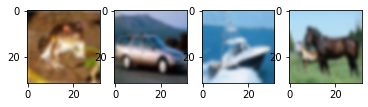

In [ ]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

### Data Preprocessing code

In [ ]:
# 이미지 정규화 작업
print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
#train set에 있는 데이터로만 평균과 표준편차를 구함
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])

#train과 test셋 모두 정규화 작업    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996
2.126789409516928


In [ ]:
batchSize = 512            #-- Training Batch Size
num_classes = 10           #-- Number of classes in CIFAR-10 dataset
num_epochs = 50            #-- Number of epochs for training   
learningRate= 0.001        #-- Learning rate for the network
lr_weight_decay = 0.95     #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


img_rows = 32              #-- input image dimensions
img_cols = 32 

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
from keras import initializers
import copy
result = {}
y = {}
loss = []
acc = []
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for dropout in dropouts:
    print ("Dropout: ", (dropout))
    model = Sequential()

    #-- layer 1
    model.add(Conv2D(64, 3, 3,
                            border_mode='same',
                            activation='relu',
                            input_shape=(img_rows, img_cols,3)))
    model.add(Dropout(dropout))  
    model.add(Conv2D(64, 3, 3, activation='relu',border_mode='same'))
    model.add(Dropout(dropout))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 2
    model.add(Conv2D(128, 3, 3, activation='relu',border_mode='same'))
    model.add(Dropout(dropout))                                        
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 3                         
    model.add(Conv2D(256, 3, 3, activation='relu',border_mode='same'))
    model.add(Dropout(dropout)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##-- layer 4
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    #-- layer 5
    model.add(Dense(512, activation='relu'))

    #-- layer 6
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    model_cce = model.fit(X_train, Y_train, batch_size=batchSize, nb_epoch=num_epochs, verbose=1, shuffle=True, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    y[dropout] = model.predict(X_test)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    result[dropout] = copy.deepcopy(model_cce.history)   
    loss.append(score[0])
    acc.append(score[1])

Dropout:  0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.2626 - accuracy: 0.1510 - val_loss: 2.2001 - val_accuracy: 0.2385
Epoch 2/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.1028 - accuracy: 0.2684 - val_loss: 1.9871 - val_accuracy: 0.3046
Epoch 3/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.9228 - accuracy: 0.3220 - val_loss: 1.8428 - val_accuracy: 0.3445
Epoch 4/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8227 - accuracy: 0.3535 - val_loss: 1.8047 - val_accuracy: 0.3572
Epoch 5/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.7606 - accuracy: 0.3778 - val_loss: 1.7539 - val_accuracy: 0.3717
Epoch 6/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7005 - accuracy: 0.4009 - val_loss: 1.7257 - val_accuracy: 0.3956
Epoch 7/50
50000/50000 [==============================] - 4s 89us/